In [1]:
import sys
sys.path.insert(0,'../')
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

start reinterpolation. number of slice 1
t_x 1.0
t_z 1.0
xbins 500
zbins 500


In [3]:
testCSR.run()

Calculating CSR at s= 0.1
--- 9.248056650161743 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-wakes.h5
Finish step 2 in 10.037299633026123 seconds
Calculating CSR at s= 0.2
--- 8.405277967453003 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-wakes.h5
Finish step 3 in 9.267648696899414 seconds
Calculating CSR at s= 0.30000000000000004
--- 8.181609869003296 seconds ---
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/dipole-2024-06-06T15_41_18-07_00-wakes.h5
Fin

## Parallel Run with MPI

In [5]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [21]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'dipole-2024-05-27T15_45_51-07_00',
                             work_dir = './output')

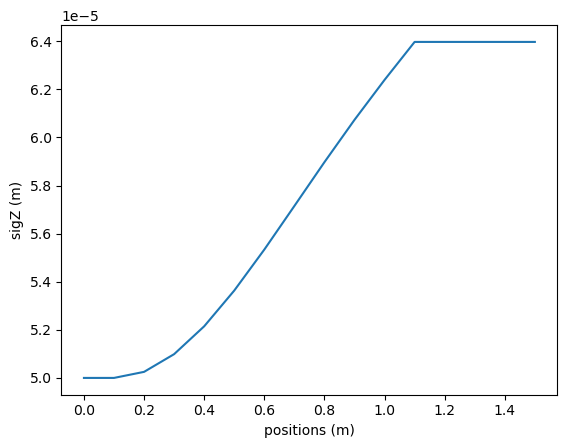

In [22]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 1.5000000000000002 m, step count 15
ebeam energy 5000000026.236993


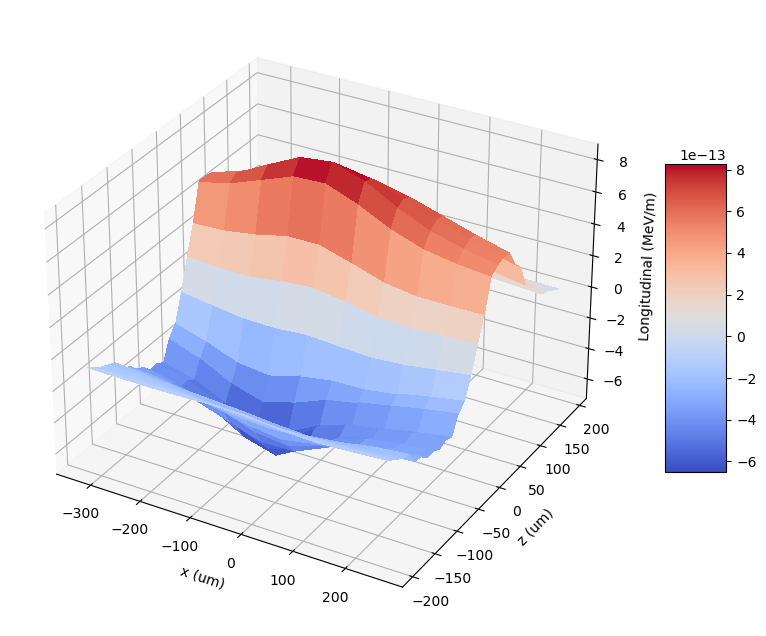

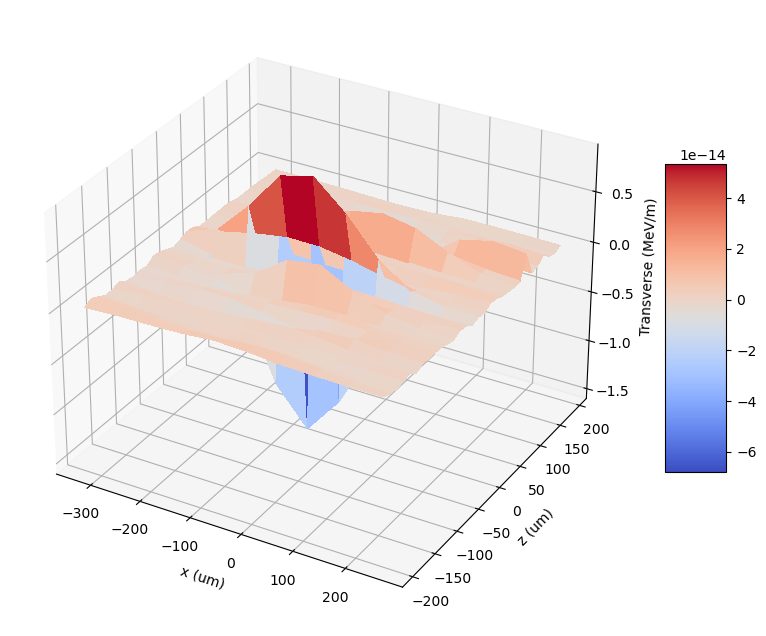

In [23]:
DFplot.plot_wakes(s = 1.5)

plot longitudinal wakes at nearest point s  = 0.6 m, step count 6


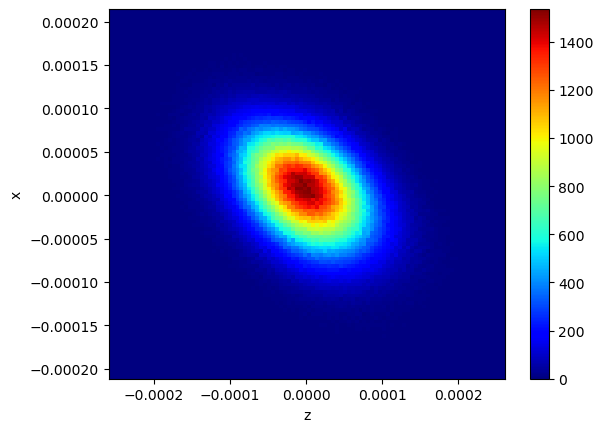

In [36]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')

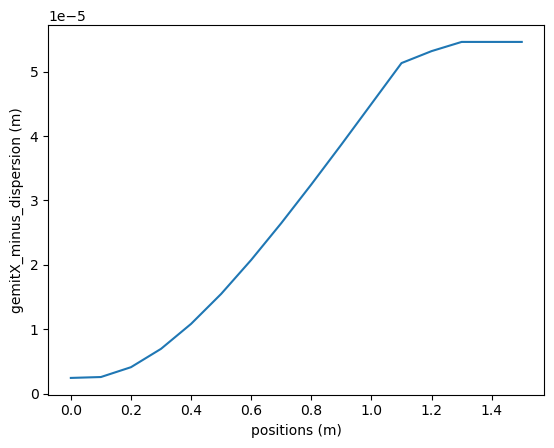

In [37]:
DFplot.plot_stats(key = 'gemitX_minus_dispersion')